CUDA STATUS 1
4


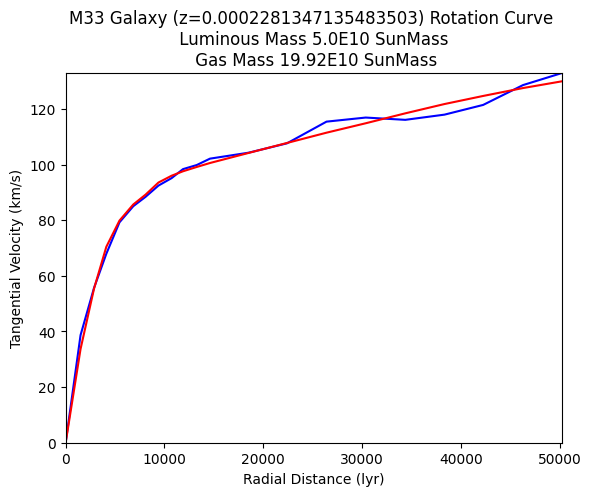

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hugalaxy import GalaxyWrapper, calculate_mass, plotRotationCurve, density_wrapper, calculate_rotational_velocity

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 300
nz = 100
ntheta = 180
nr_sampling = 103
nz_sampling = 104
R_max = 50000.0
# x0 = [1.844837e+01,4.740177e-04,1.457439e-01,2.269586e-05,1.360023e+05]
x0 =  [17.893718222852044, 0.00047066801240602216, 0.1462822060787215, 2.1683777520902726e-05, 138317.8152412921]
rho_0, alpha_0, rho_1, alpha_1, h0 = x0
GalaxyMass = 5E10
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, nr_sampling, nz_sampling, ntheta, redshift,GPU_ID=0, cuda=True)

M33.read_galaxy_rotation_curve(m33_rotational_curve)
v_sim = M33.simulate_rotation_curve()
plotRotationCurve(M33)

In [2]:
M33.print_density_parameters()

[17.694317265264992,
 0.00047109231536165616,
 0.15138146945184416,
 2.182849016937295e-05,
 140044.12003943836]

In [ ]:
new_v = M33.move_galaxy(2)
plotRotationCurve(M33)

In [4]:
M33.print_density_parameters()

[489.8535748655162,
 0.0014334694276409545,
 4.215849046219706,
 6.908173544699185e-05,
 61582.87481434588]

4
4


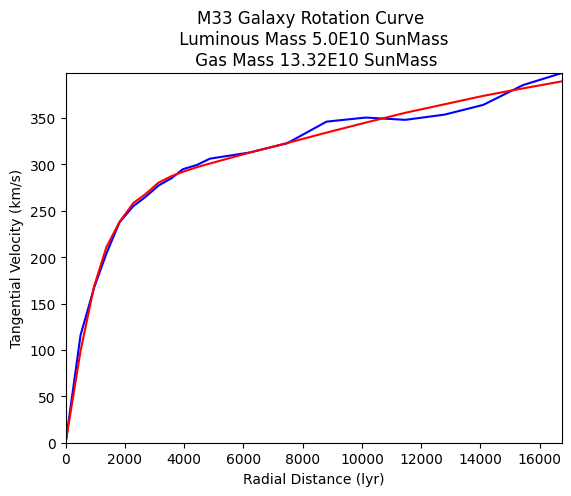

In [5]:
new_v = M33.move_galaxy(2)
plotRotationCurve(M33)

In [6]:
M33.print_density_parameters()

[498.06326930987063,
 0.0014655046806956477,
 4.344581843225459,
 8.386259574012512e-05,
 48148.196381119524]

4
4


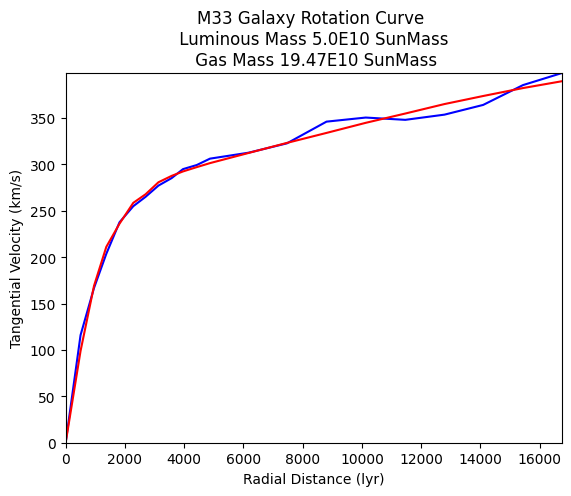

In [7]:
new_v = M33.move_galaxy(2)
plotRotationCurve(M33)

In [8]:
M33.print_density_parameters()

[453.6038952847771,
 0.0014063873193446944,
 4.091186847834061,
 6.767998257030233e-05,
 48688.052631394756]

In [ ]:
v_sim = M33.simulate_rotation_curve()
M33.print_density_parameters()


In [ ]:
def simulatedRescaledRotationCurve(newz, M33):
    # rescaling already optimized factors
    oldz = M33.redshift
    rescalingFactor = (1+newz)/(1+oldz)
    alpha_0=M33.alpha_0 *rescalingFactor
    alpha_1=M33.alpha_1 * rescalingFactor
    h0 = M33.h0 * rescalingFactor
    # initial guesses for the rescaled rotation curve at a different epoch defined by redshift newz
    x0 = [M33.rho_0, alpha_0, M33.rho_1, alpha_1, h0]
    # rescaling rotational curve and r
    M33.set_r( np.array(M33.r / rescalingFactor) )
    rotation_curve =np.array(M33.print_rotation_curve())
    rotation_curve[:,0] = 
    M33.set_rotation_curve(rotation_curve)
    
    

In [ ]:
hugalaxy.__dir__()

In [ ]:
epoch=100E6
time_step_years = 10E6
eta = 1/100
temperature =7
for i in np.arange(11):
    current_masses = M33.DrudePropagator( redshift,  time_step_years,  eta,  temperature)
    epoch += time_step_years


In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# r is of shape [5, 1, 1]
r = torch.randn(5, 1, 1)

# r_sampling_ii is a scalar
r_sampling_ii = torch.tensor(0.5)

# mask will have shape [5, 1, 1]
mask = r < r_sampling_ii

# commonfactor is of shape [5, 4, 3]
commonfactor = torch.randn(5, 4, 3)


# mask_broad will be broadcasted to the shape of commonfactor [5, 4, 3]
mask_broad = mask * commonfactor


# Convert the tensor to a NumPy array
mask_broad_np = mask_broad.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_broad_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()

In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the tensor
mask = torch.load("cmake-build-debug/testCPPLibrary/mask_double.pt")

# Convert the tensor to a NumPy array
mask_np = mask.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()
